In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from scipy.special import expit
from scipy.optimize import fmin, minimize
import glob as glob
import matplotlib
matplotlib.style.use('ggplot')

# .py
%load_ext autoreload
%autoreload 2
import bounded_alphas, costs, model, weighted_costs, weighted_bounded_alphas

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


running model
getting cost from nweek ahead
getting bounded alphas ...
done getting alphas ...
getting cost from nweek ahead
getting bounded alphas ...
done getting alphas ...


In [2]:
def split_data(data):
    train_mask = (data.index < "2011")
    train = data[train_mask]
    test_mask = (data.index > "2011")
    test = data[test_mask]
    return train, test

In [3]:
all_weather = pd.read_csv("weather01-16.csv")

In [4]:
cm_weather = all_weather[all_weather.stn_name == "Chiang Mai"]
cm_weather.index = pd.DatetimeIndex(cm_weather.date)
mask = (cm_weather.index > "2003") & (cm_weather.index < "2016")
cm_weather = cm_weather[mask]

provinces_df = pd.read_csv("all-dengues.csv")
provinces_df.index = pd.DatetimeIndex(provinces_df.date)
provinces_df = provinces_df.drop(['date','date.1'],axis=1)
cm_dengues = provinces_df[provinces_df['จังหวัด'] == 'ChiangMai'].resample('W').size()
cm_dengues_df = pd.DataFrame(cm_dengues,columns=['cases'])

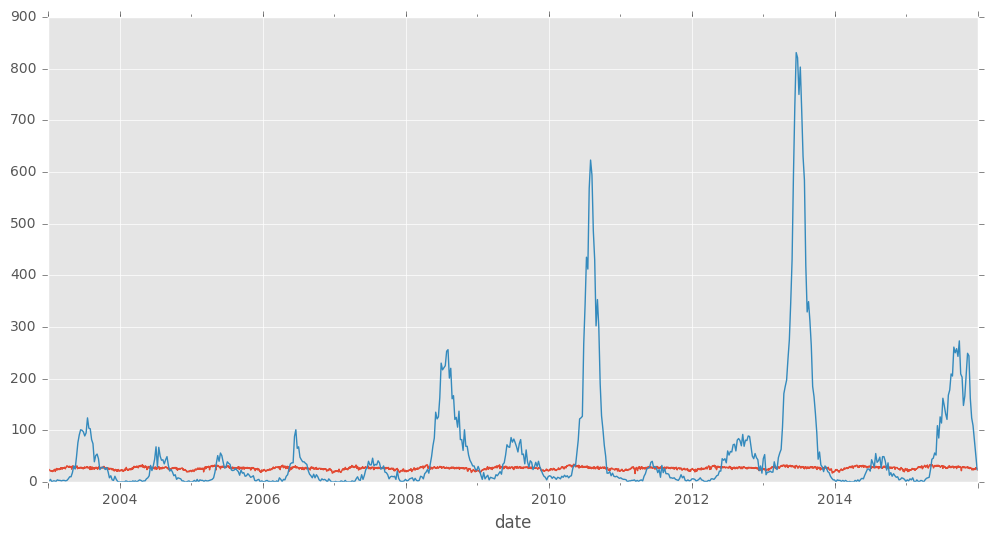

In [6]:
plt.figure(figsize=(12,6))
cm_weather.meantemp.plot()
cm_dengues_df.cases[:-52].plot()

In [6]:
# cm_weather.tail()

In [5]:
cm_avg_weather = cm_weather[['avgrh','dday','maxtemp','meantemp','mintemp','rain']].resample('W').mean()


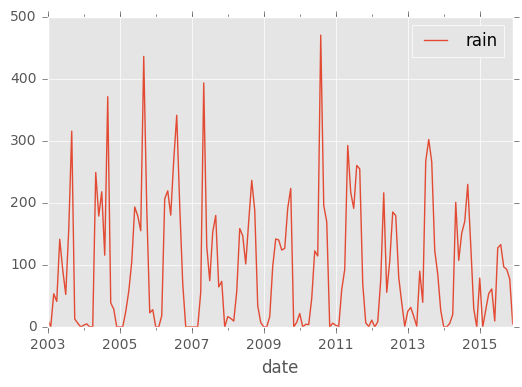

In [10]:
cm_weather[['rain']].resample('M').sum().plot()

In [6]:
cm_dengues_weather = pd.concat([cm_avg_weather,cm_dengues_df[:-52]],axis=1)

In [7]:
cm_dengues_weather

,avgrh,dday,maxtemp,meantemp,mintemp,rain,cases
date,,,,,,,
2003-01-05,88.250000,3.500000,26.300000,23.500000,20.750000,3.050000,1
2003-01-12,81.000000,9.000000,27.942857,22.828571,17.757143,0.000000,2
2003-01-19,80.714286,16.000000,27.514286,21.457143,15.400000,0.000000,5
2003-01-26,75.857143,23.000000,27.728571,20.671429,13.700000,0.000000,0
2003-02-02,75.857143,21.142857,29.842857,22.628571,15.500000,0.000000,2
2003-02-09,74.857143,6.000000,28.842857,22.728571,16.685714,0.000000,2
2003-02-16,70.857143,13.000000,32.457143,24.957143,17.514286,0.000000,1
2003-02-23,62.857143,20.000000,32.885714,24.200000,15.585714,0.000000,4
2003-03-02,57.857143,19.000000,34.200000,24.457143,14.742857,0.000000,3


In [8]:
cm_dengues_weather_split = split_data(cm_dengues_weather)
cm_dengues_train, cm_dengues_test = cm_dengues_weather_split[0], cm_dengues_weather_split[1]

In [9]:
cm_dengues_train.tail()

,avgrh,dday,maxtemp,meantemp,mintemp,rain,cases
date,,,,,,,
2010-11-28,73.428571,25.000000,31.371429,25.100000,20.300000,0.000000,17
2010-12-05,73.142857,10.571429,30.185714,23.914286,18.785714,0.000000,11
2010-12-12,74.428571,9.000000,30.628571,24.828571,20.328571,0.057143,10
2010-12-19,76.428571,16.000000,28.100000,23.614286,20.185714,0.814286,11
2010-12-26,73.285714,23.000000,30.757143,23.457143,17.842857,0.000000,9


In [13]:
%%time

lg = 16
half_trimester = 9 # static

def cost(w):
    
    ret = 0
    for i in range(len(cm_dengues_train)-(lg+1)):
#         real_case = cm_dengues_df[:-52].cases[i+1]
        cases_for_prediction = cm_dengues_train.cases[i:i+lg]
        nth_week = i + lg
        mean_temperatures = cm_dengues_train.meantemp[i:i+half_trimester]
                                #guess(w, nth_week, cases_for_prediction, degree, rain)
        predicted_case = model.guess(
            w,
            nth_week,
            cases_for_prediction,
            mean_temperatures)
        real_case = cm_dengues_train.cases[i+(lg+1)] + 1
        sigma_sq = real_case + 1
        
        ret += ((real_case - predicted_case)**2)/float(sigma_sq)
    return ret

arr = [1.]*(lg+1+half_trimester+1+2)
w = minimize(cost,arr)

CPU times: user 13min 11s, sys: 5 s, total: 13min 16s
Wall time: 13min 37s


In [14]:
w.x

running model


array([ -4.55850451e+01,  -9.19916971e-02,   2.09708207e+00,
         1.59185116e+00,   1.22423490e+00,   7.43417111e-01,
         7.24664639e-01,   2.58841448e-01,  -5.28271580e-01,
        -2.27351163e-01,   3.67620097e-01,   2.32496698e-01,
        -9.62097414e-01,  -2.08647407e+00,  -5.55213288e+00,
        -1.26669607e+01,   2.17446580e+01,   1.40342467e+00,
         7.71212202e+00,  -1.83733412e-04,  -1.48299418e-05,
         3.28705268e-06,  -3.72095670e-06,  -9.52655123e-07,
         8.63277778e-07,   8.23766715e-06,   2.33006303e-06,
         1.06492630e-05,   1.51786318e-05])

In [15]:
def make_line(start_week,real,predictions,title,x_axis,y_axis,
              real_legend='Real',predict_legend='Prediction'):
    plt.figure(figsize=(12,6))
    plt.plot(range(len(real)),real,'-r',label=real_legend)
    plt.plot(range(start_week,len(predictions)+start_week),predictions,'-k',label=predict_legend,alpha=0.4)
    plt.axvline(start_week)
    plt.text((start_week*2)+10,300,'Prediction Start',horizontalalignment='center',verticalalignment='center')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend()
    plt.title(title)
    
def plot_all_predictions(LAG, real, province, nweeks_to_predict, all_predictions):
    
    plt.figure(figsize=(13,6))
    plt.plot(range(len(real)),real,label='real')
    graph_title = "%s's Dengue Prediction"%province
    plt.title(graph_title)
    for i in range(len(all_predictions)):
        cur_week_guess = nweeks_to_predict[i]
        start_predict_week = LAG+(cur_week_guess-1)
        predicted_cases = all_predictions[i]
        x_weeks = range(start_predict_week,len(predicted_cases)+start_predict_week)
        line_label = "%d week guess"%cur_week_guess
        plt.plot(x_weeks,predicted_cases,label=line_label,alpha=0.8)
    
    seperate_train_test(cm_dengues_df.cases,cm_dengues_train)
    plt.axvline(LAG)
    plt.text((LAG*2)+10,300,'Prediction Start',horizontalalignment='center',verticalalignment='center')
    plt.xlabel("# week starting 2003")
    plt.ylabel("Dengue cases")
    plt.legend()
#     plt.savefig("13-lags-14-weeks-weather-chiangmai.png")
    
def seperate_train_test(all_data,train_data):
    plt.axvspan(0, len(train_data), color='blue', alpha=0.1)
    plt.text((len(train_data)/2)-25,700,'Train Period',size=16)
    plt.axvline(len(train_data)+1,linewidth=0.5, color='green')
    plt.text(len(train_data)+20,700,'Test Period',size=16)
    plt.axvspan(len(train_data)+1, len(all_data), color='green', alpha=0.1)

In [16]:
predictions = []
for i in range(len(cm_dengues_weather)-(lg+1)):
#     print cm_dengues_weather.meantemp[i]
    print i,i+half_trimester
    predicted = model.guess(
        w.x,
        i+(lg+1),
        cm_dengues_weather.cases[i:i+lg],
        cm_dengues_weather.meantemp[i:i+half_trimester])
    predictions.append(predicted)

# plt.figure(figsize=(12,6))
# plt.plot(range(26,len(predictions)+26),predictions,label="prediction")
# plt.plot(range(len(cm_dengues_weather)),cm_dengues_weather.cases)
# plt.legend()

0 9


ValueError: shapes (7,) and (10,) not aligned: 7 (dim 0) != 10 (dim 0)

(0, 700)

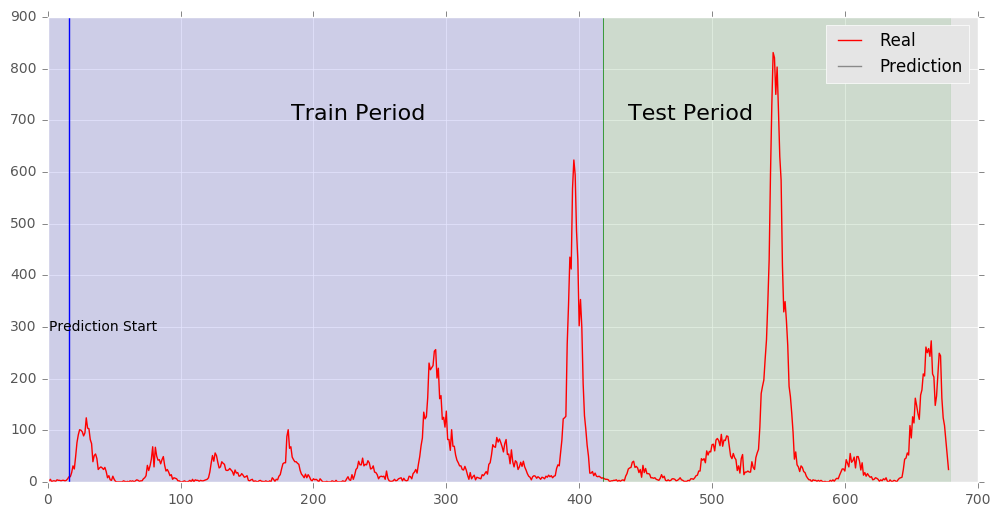

In [17]:
make_line(lg,cm_dengues_weather.cases,predictions,"","","")
seperate_train_test(cm_dengues_weather.cases,cm_dengues_train)
plt.xlim(0,700)

In [33]:
from scipy import stats
real = cm_dengues_weather.cases[-262:]
predicted = predictions[-262:]
slope, intercept, r_value, p_value, std_err = stats.linregress(real,predicted)

In [34]:
r_value**2

0.91620613320321764

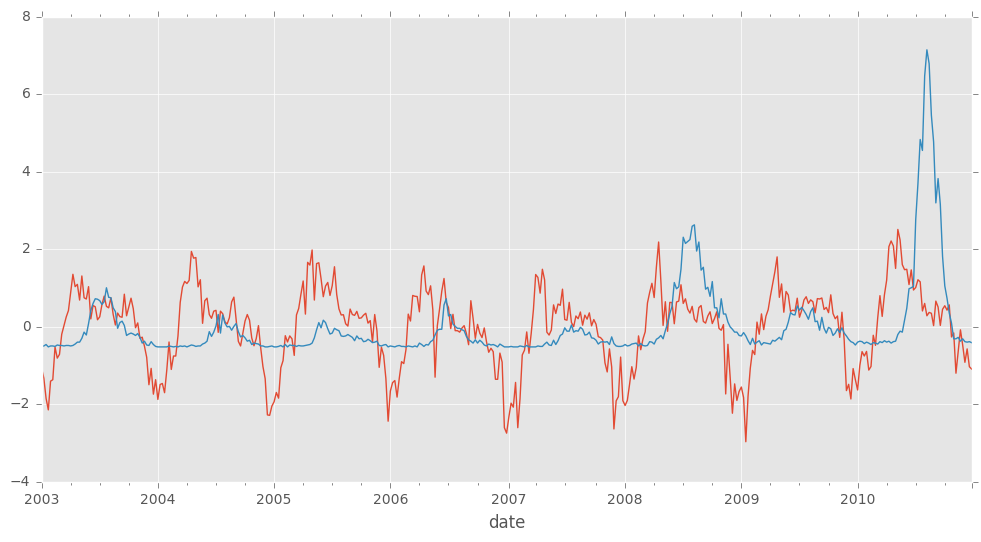

In [83]:
plt.figure(figsize=(12,6))
((cm_dengues_train.meantemp - cm_dengues_train.meantemp.mean())/cm_dengues_train.meantemp.std()).plot()
((cm_dengues_train.cases-cm_dengues_train.cases.mean())/cm_dengues_train.cases.std()).plot()

In [10]:
yr = [str(i) for i in range(2003,2012)]
tmp = []
for i in range(len(yr)-1):
    mask = (cm_dengues_train.index > yr[i]) & (cm_dengues_train.index < yr[i+1])
    tmp.append(cm_dengues_train[mask])

In [11]:
train_weekly_cases = []
train_weekly_meantemp = []
train_weekly_rain = []
train_weekly_avgrh = []
for data in tmp:
    train_weekly_cases.append(data.cases)
    train_weekly_meantemp.append(data.meantemp)
    train_weekly_rain.append(data.rain)
    train_weekly_avgrh.append(data.avgrh)

In [12]:
train_weekly_cases = np.array(train_weekly_cases)
train_weekly_meantemp = np.array(train_weekly_meantemp)
train_weekly_rain = np.array(train_weekly_rain)
train_weekly_avgrh = np.array(train_weekly_avgrh)

In [13]:
avg_train_weekly_cases = sum(train_weekly_cases) / 8.
norm_train_weekly_cases = pd.Series((avg_train_weekly_cases - avg_train_weekly_cases.mean())/avg_train_weekly_cases.std())

avg_train_weekly_meantemp = sum(train_weekly_meantemp) / 8.
norm_train_weekly_meantemp = pd.Series((avg_train_weekly_meantemp - avg_train_weekly_meantemp.mean())/avg_train_weekly_meantemp.std())

avg_train_weekly_rain = sum(train_weekly_rain) / 8.
norm_train_weekly_rain = pd.Series((avg_train_weekly_rain - avg_train_weekly_rain.mean())/avg_train_weekly_rain.std())

avg_train_weekly_avgrh = sum(train_weekly_avgrh) / 8.
norm_train_weekly_avgrh = pd.Series((avg_train_weekly_avgrh - avg_train_weekly_avgrh.mean())/avg_train_weekly_avgrh.std())

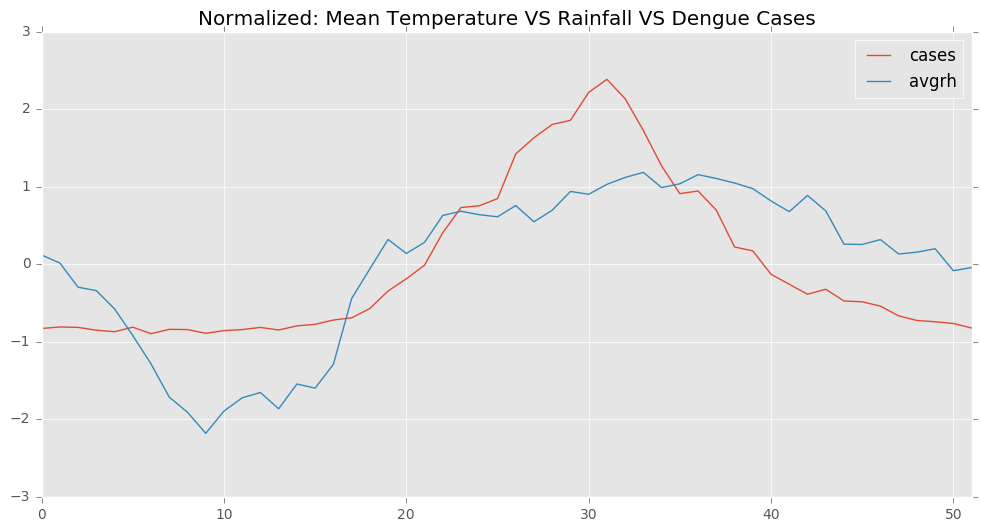

In [15]:
plt.figure(figsize=(12,6))
plt.plot(norm_train_weekly_cases,label='cases')
# plt.plot(norm_train_weekly_meantemp,label='meantemp')
# plt.plot(norm_train_weekly_rain,label='rain')
plt.plot(norm_train_weekly_avgrh,label='avgrh')
plt.xlim(0,51)
plt.title("Normalized: Mean Temperature VS Rainfall VS Dengue Cases")
plt.legend()

In [28]:
w_case = 7
temperature = 2
rainfall = 2
humid = 2

a = [1.]*w_case
b = [2,2,3,3,4,4]
a = np.append(a,b)
print a[:w_case]
print a[w_case:w_case+temperature]
print a[w_case+temperature:w_case+temperature+rainfall]

[ 1.  1.  1.  1.  1.  1.  1.]
[ 2.  2.]
[ 3.  3.]


In [30]:
all_w = [1,1,1,1,1,1,1,2,2,3,3,4,4]
case = all_w[:w_case]
temp = all_w[w_case:w_case+temperature]
rain = all_w[w_case+temperature:w_case+temperature+rainfall]
hum = all_w[w_case+temperature+rainfall:w_case+temperature+rainfall+humid]
print case
print temp
print rain
print hum

[1, 1, 1, 1, 1, 1, 1]
[2, 2]
[3, 3]
[4, 4]


In [35]:
model.guess([1.]*29,0,[1.]*16,[0.]*9) # lag = 16; week = 9

31.950876435659506